## Question 1 :  Generating a dataset for binary classification

Generate a synthetic dataset for binary classification using make classification from the scikit-learn library. The dataset should have 1000 samples, 2 features, and their labels. Introduce some overlap between classes by adjusting the relevant parameter(s). Split the dataset into train and test sets. Plot the training data using matplotlib.

In [9]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [10]:
#The following function returns two numpy arrays X,y where X is the features and y is the corresponding labels.
X, y = make_classification(
                n_samples=1000,    # No. of observations
                n_features=2,     # No. of features
                n_redundant=0,    # No. of redundant features
                n_classes=2,      # No. of classes 
                class_sep=1.5,    # To separate classes
                random_state=1)  # For reproducibility


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


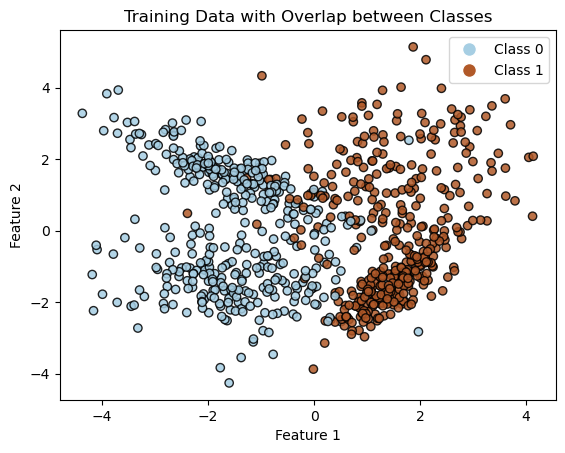

In [12]:
plt.figure()
#X_train[:, 0] selects first feature and X_train[:, 1] selects second feature of all columns
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o', edgecolor='k', alpha=0.85)
plt.title('Training Data with Overlap between Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Paired(0), markersize=10, label='Class 0'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Paired(11), markersize=10, label='Class 1')],
           loc='best')
plt.show()

## Question 2 : Perceptron Algorithm from Scratch

Write a Python function to implement the Perceptron algorithm from scratch. The function should take the dataset, learning rate, and the number of iterations as parameters.

In [13]:
import numpy as np
from sklearn.datasets import make_classification
import random
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [14]:
def Perceptron_algo(X, y, w, l_rate=0.1,itera=5):
    n_features = X.shape[1]
    bias=1
    for _ in range(itera):
        for i in range(len(X)):
            sum_val = np.dot(X[i], w) + bias
            if sum_val >= 0:
                prediction=1
            else:
                prediction=-1
                
            if prediction != y[i]:
                w += l_rate * y[i] * X[i] 
                bias += l_rate * y[i]
    return w, bias



## Train and Test the Model

Use the generated dataset to train your Perceptron algorithm. Experiment with different learning rates and iterations. Select the best model based on accuracy and print the classification report. Plot the decision boundary for the best model on the training data and evaluate the model on the test data.

In [15]:
n_features=2
weights = np.random.random(n_features) #initialiseing random weights

#Changing label to 1,-1 from 0,1
y_test = 2 * y_test - 1
y_train = 2 * y_train - 1
l_rate=0.5 #Learning rate
itera=500 #No. of iterations

weights,bias = Perceptron_algo(X_train,y_train,weights, l_rate,itera)

#Doing predictions for test set
linear_output = np.dot(X_test, weights) + bias
linear_output = np.where(linear_output > 0, 1, -1) #Give 1 when the output is >0 and -1 otherwise

print(classification_report(y_test,linear_output))

              precision    recall  f1-score   support

          -1       0.95      0.88      0.91       100
           1       0.89      0.95      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200



<Figure size 640x480 with 0 Axes>

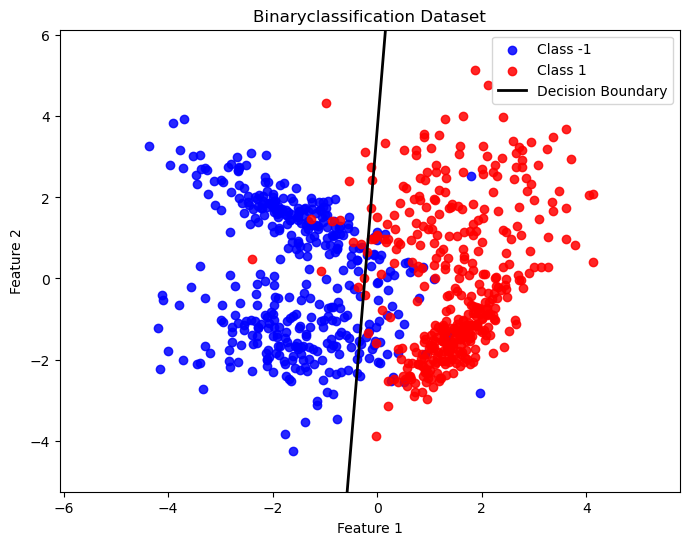

In [16]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx = np.linspace(x_min, x_max, 100) #Generate 100 points between x_min and x_max
yy = -(weights[0] * xx + bias) / weights[1] #solve for y using the equation w0*xx+w1*yy+bias=0 



plt.clf()
plt.figure(figsize=(8, 6))

# Scatter plot with different colors for each class (0 or 1)
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color='blue', label='Class -1', alpha=0.85)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Class 1', alpha=0.85)

# Plot decision boundary
plt.plot(xx, yy, color='black', label="Decision Boundary", linewidth=2)

# Adding labels and title
plt.title("Binaryclassification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)

plt.legend()

## Logistic Regression

Implement logistic regression using the scikit-learn library on the synthetic dataset already generated. Train the model on the training set and evaluate its performance on the test set. Print the classification report and plot the decision boundary for the logistic regression model.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.92      0.94       100
           1       0.92      0.96      0.94       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



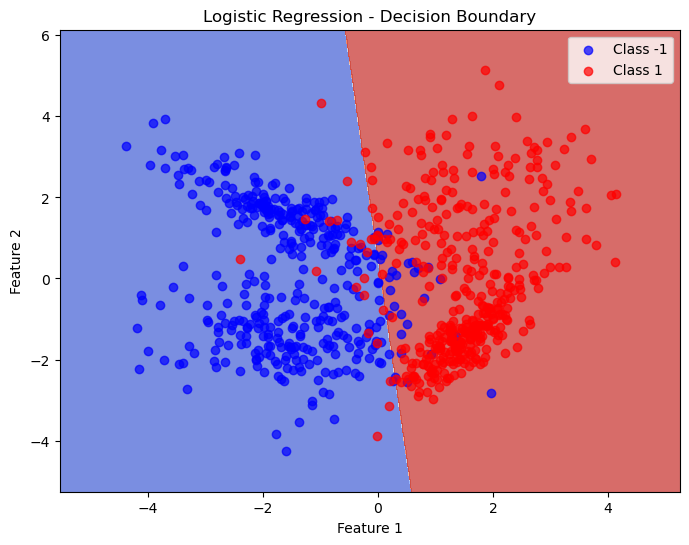

In [19]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = log_reg.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Plot the decision boundary
# Set up a grid to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                     np.linspace(y_min, y_max, 1000))

# Get the predictions for each point in the meshgrid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)

# Scatter plot with different colors for each class
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color='blue', label='Class -1', alpha=0.7)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Class 1', alpha=0.7)

# Adding labels and title
plt.title("Logistic Regression - Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Show the plot
plt.show()

## Write Observations

Compare the decision boundaries of the logistic regression model and the best-performing perceptron model from the previous task. Plot both decision boundaries and provide observations regarding their differences. Discuss the performance of each model, highlighting strengths, weaknesses, and any noticeable patterns.

#### Comparing Perceptron and Logistic regression

Comparing the classification report of Perceptron and logistic regression, we find that logistic regression outperforms the Perceptron model in all key metrics (accuracy, precision, recall, and F1-score). This is evident from the decision boundary too.

Generally, logistic regression performs better than perception. This is because perception is generally based on hard-threshold classification, where weights are updated based on misclassifications unlike perception, logistic regression models probabilities, and does not make abrupt updates to the decision boundary based on a single misclassified point. That is, the model seeks the best separation based on probabilities, unlike perception which updates the weight value even on a misclassified point.


#### Plotting points and decision boundary

To plot, we first create a mesh grid (xx, yy) over the entire feature space. We then use scatter plot to show the training points on top of the decision boundary and contourf to fill the areas of the plot based on class predictions. For the Perceptron, we compute the decision boundary by evaluating the linear equation: $w_0 * xx + w_1 * yy + bias = 0$ while logistic Regression uses the predict method on the mesh grid to get the predicted class labels.

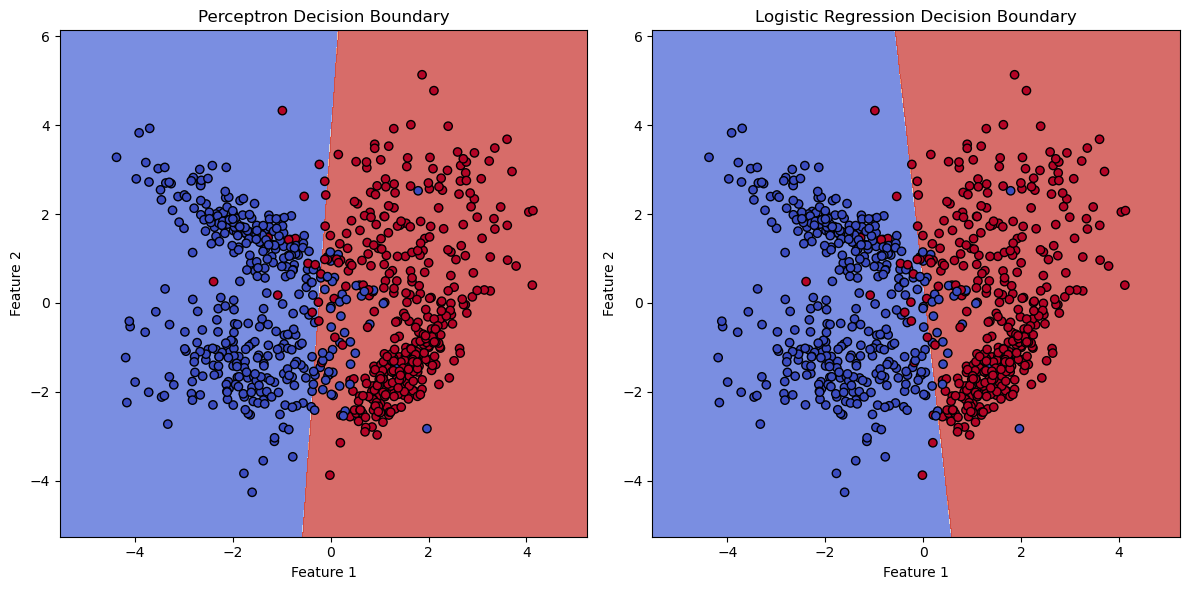

In [25]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

# Perceptron decision boundary
Z_perceptron = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
Z_perceptron = Z_perceptron.reshape(xx.shape)
Z_perceptron = np.where(Z_perceptron > 0, 1, -1)

# Logistic Regression decision boundary
Z_log_reg = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z_log_reg = Z_log_reg.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot Perceptron decision boundary
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_perceptron, alpha=0.75, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
plt.title('Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot Logistic Regression decision boundary
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_log_reg, alpha=0.75, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()